# Credit fraud


In this example, I want to show you how to do a few things.
 
1. Train a K-neighbors classifier model
2. Visualize the ROC and Area under the ROC
3. Determine whether we need a different model or not. 

Before we can get the data, we need to make sure that we are setting up our environment. 

In [7]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Get Data

https://www.kaggle.com/code/kelsead/anomaly-detection-credit-card-fraud/notebook

**distance_from_home** - Distance from home where transaction occured <br>
**distance_from_last_transaction** - Distance from where last transaction occured <br>
**ratio_to_median_purchase_price** - Ratio of purchased price transaction to median purchase price <br>
**repeat_retailer** - Has historically purchased from retailer (1 = Yes / 0 = No) <br>
**used_chip** - Was chip used in transaction (1 = Yes / 0 = No) <br>
**used_pin_number** - Was PIN used to complete transaction (1 = Yes / 0 = No) <br>
**online_order** - Was transaction an online order (1 = Yes / 0 = No)<br>
**fraud** - Was transaction fraudulent (1 = Yes / 0 = No) <br>

In [8]:
import pandas as pd
df = pd.read_csv('card_transdata.csv')

In [9]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [10]:
fraud = df[df['fraud'] == 1]
nonFraud = df[df['fraud'] == 0]

x = len(fraud)/len(df)
y = len(nonFraud)/len(df)

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 8.7403 %
non frauds : 91.2597 %


In [11]:
df = df.sample(frac=1)

frauds = df[df['fraud'] == 1]
non_frauds = df[df['fraud'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
69842,20.586642,0.519156,8.333021,1.0,1.0,0.0,1.0,1.0
846820,133.313201,0.623433,0.380874,1.0,0.0,0.0,1.0,1.0
688626,114.680467,2.774010,0.065409,1.0,0.0,0.0,1.0,1.0
235418,7.342305,130.569766,0.775682,1.0,0.0,0.0,1.0,1.0
757239,18.823577,4.060858,5.362601,1.0,1.0,0.0,1.0,1.0


### Train model

In [12]:
# linear algebra 
import numpy as np

# pyplot from matplotlib
import matplotlib.pyplot as plt

# import library to generate training and testing datasets
from sklearn.model_selection import train_test_split

# import library to help scale features in the datsets
from sklearn.preprocessing import StandardScaler

# import encoding library to transform data values
from sklearn.preprocessing import LabelEncoder

# import K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec


In [13]:
y = new_df['fraud']
X = new_df.drop('fraud',axis=1)


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
X_train = normalize(X_train)
X_test=normalize(X_test)


In [15]:
neighbours = np.arange(1,30)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel()) 

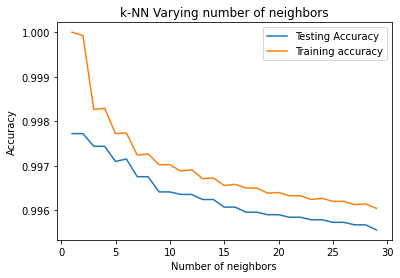

In [16]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [17]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [18]:
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())
knn_predicted_test_labels=knn.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(y_test,knn_predicted_test_labels)

In [20]:
#printing
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy: ",knn_accuracy_score)
print("Precison: ",knn_precison_score)
print("Recall: ",knn_recall_score)
print("F1: ",knn_f1_score)
print("MCC: ",knn_MCC)
print(classification_report(y_test,knn_predicted_test_labels))

K-Nearest Neighbours
Scores
Accuracy:  0.9977245577109051
Precison:  0.9977155910908052
Recall:  1.0
F1:  0.9988564894225271
MCC:  0.7947209757031833
              precision    recall  f1-score   support

         0.0       1.00      0.63      0.78       109
         1.0       1.00      1.00      1.00     17470

    accuracy                           1.00     17579
   macro avg       1.00      0.82      0.89     17579
weighted avg       1.00      1.00      1.00     17579



In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, knn_predicted_test_labels)

Text(0.5, 0, 'False Positive Rate')

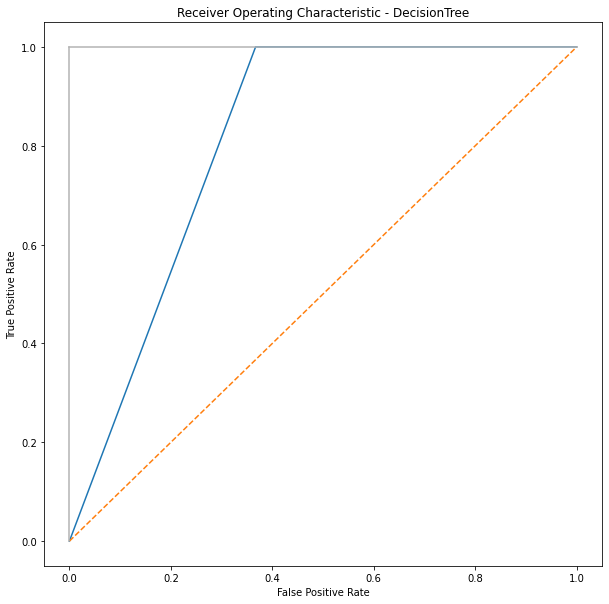

In [27]:
from matplotlib import pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate, true_positive_rate)
plt.([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Now, For getting ROC_AUC score we can simply pass the test data and the predected data into the function ruc_auc_score. We are printing it with print statements for better understanding.


In [37]:
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, knn_predicted_test_labels))

roc_auc_score for RandomForest:  0.8165137614678899


This model did a lot better than a random model with a Area under the ROC curve is .82, much higher than 0.5.